<h1 style="text-align:center"> MIDTERM EXAM </h1>
Name: Quan Ta

- Dataset: San Francisco Building Permit
- Link to the dataset: https://www.kaggle.com/aparnashastry/building-permit-applications-data/data#

Business Understanding (10pts)
- Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?)
- Describe how you would define and measure the outcomes from the dataset
- How would you measure the effectiveness of a good prediction algorithm or clustering algorithm?

1. A building permit is an official document issued a governmental agency that allows you or your contractor to construct or remodel on one's property. This data was constructed based on building permits that San Francisco authority issued and published on San Francisco open data portal. The initial purpose of San Francisco Building Permit dataset was to record any permits for look-up in the future. However, the purpose of the dataset changes as the public believe that the delays in issuing building permits negatively influence the real estate industry. Therefore, this dataset was put together to investigate on whether the building permit have anything related to the imbalance in demand and supply of the real estate market in San Francisco

2. From this dataset, I will try to draw a conclusion on whether the waiting time on permit issues have any relationships with zipcode, type of permits or the cost of the project. Being able to draw any conclusion from this dataset would be possible. An effective outcomes will be a strong correlation between waiting time and any other attributes. From there on, it will be possible to predict the waiting time for each cases of permit filing. A non-effective outcome is that I cannot predict waiting time for any specific kind of cases. Them there will be no correlation between waiting time of permit filing and other attributes in the datasets.

3. I expect the accuracy to be 95 percent, as there are many possible error and miscalculation coming from missing data. In  my opinion, the effectiveness of a good prediction algorithm is determined by its accuracy. In the case of this dataset, the prediction will be able to show an estimated time of wait for permit issuing.

Data Understanding (80pts)
- Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file (10 pts)
- Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems? (15 pts)
- Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attribute and describe what they mean or if you found sth interesting (Note: You can also use data from other source for comparison) (10 pts)
- Visualize the most important attributes appropriately (at least 5 attributes) (Important: Provide an interpretation for each chart. Explain for each attribute why you chose the used visualization) (15 pts)
- Explore relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate (15 pts)
- Identify and explain interesting reationships between features and the class you are trying to predict (or cluster) (10 pts)
- Are there other features that could be added to the date or created from existing features? Which ones?

There are 43 attributes in the data file. Those are:
1. Permit Number: Number assigned while filing
2. Permit Type: Type of the permit represented numerically
3. Permit Type Definitiion: Description of the permit type
4. Permit Creation Date: Date on which permit created
5. -10. Block, Lot, Street Number, Street Number Suffix, Street Name, Street Name Suffix: Address
11. Unit: Unit of a building
12. Unit Suffix: Suffix (if applicatble) of the unit
13. Description: Details about the purpose of the permit
14. Current Status: Current status of the permit application
15. Current Status Date: Date at which current status was recorded
16. Filed Date: Date at which the permit was filed
17. Issued Date: Date at which the permit was issued
18. Completed Date: Date at which the project was completed
19. First Construction Document Date: Date on which the construction was documented
20. Structural Notification: Notification to meet legal need(s)\
21. Number of existing stories: Number of existing stories in the building
(Not applicable for certain permit types)
22. Number of proposed stories: Number of proposed stories for the construction/alteration
23. Voluntary Soft-Story Retrofit: Soft story to meet earthquake regulations
24. Fire Only Permit: Fire hazard prevention related permit
25. Permit Expiration Date: Expirition date related to issued permit
26. Estimated Cost: Initial estimation of the cost of the project
27. Revised Cost: Revised estimation of the cost of the project
28. Existing use: Existing use of the building
29. Existing units: Existing number of units
30. Proposed Use: Proposed use of the building
31. Proposed Units: Proposed number of units
32. Plansets: Plan representation indicating the general design intent of the foundation
33. TIDF Compliance: TIDF compliant or not (new legal requirement)
34. Existing Construction Type: Type of the existing contruction represented numerically
35. Existing Construction Type Description: Description of the existing construction type
36. Proposed Construction Type: Type of the proposed construction represented numerically
37. Proposed Construction Type Description: Description of the proposed construction type
38. Site Permit: Permit for site
39. Supervisor District: Supervisor District to which the building location belongs to
40. Neighborhoods - Analysis Boundaries: Neighborhood to which the building location belongs to
41. Zipcode: Zipcode of building address
42. Location: Location in latitude, longtitude pair
43. Record ID: Some ID, not useful for this

From my observation, I see that there are many missing values in this datasets. This happens because there are attributes like Unit Suffix, or Street Name Suffix which are not applicable to all cases of building permits. However, for some attributes like Fire Only Permit, Site Permit, missing values are equaled to "No". Therefore, I will fill up those attributes with N instead of leaving them as NA.

For this dataset, I want to look into the amount of time between the creation date and the issue date of a permit. That would be the attribute I create later and calculate the mean on. Other than this, I want to calculate average time for different type of permit, different type of existing construction type and different zipcode. I can determine whether the time for a permit to be issued actually long and point out any attribute that may affect this amount of time.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv("Building_Permits.csv")

C:\Users\taqua\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (22,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.shape

(198900, 43)

In [5]:
df.head(10)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
5,201706149344,8,otc alterations permit,06/14/2017,4105,009,800,NaN,Indiana,St,...,1.0,constr type 1,1.0,constr type 1,NaN,10.0,Potrero Hill,94107.0,"(37.75922331346539, -122.39170402628598)",1466911170855
6,201706300814,8,otc alterations permit,06/30/2017,1739,020,1291,NaN,11th,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,5.0,Inner Sunset,94122.0,"(37.764145640138565, -122.46875112470363)",1468970403692
7,M803667,8,otc alterations permit,06/30/2017,4789,014,1465,NaN,Revere,Av,...,NaN,NaN,NaN,NaN,NaN,10.0,Bayview Hunters Point,94124.0,"(37.73005099023611, -122.38784938916618)",1469035175050
8,M804227,8,otc alterations permit,07/05/2017,1212,054,2094,NaN,Fell,St,...,NaN,NaN,NaN,NaN,NaN,5.0,Lone Mountain/USF,94117.0,"(37.772393498502595, -122.45231466824669)",1469198253772
9,M804767,8,otc alterations permit,07/06/2017,1259,016,89,NaN,Alpine,Tr,...,NaN,NaN,NaN,NaN,NaN,8.0,Haight Ashbury,94117.0,"(37.7691724293766, -122.43734859051908)",146932394171


In [6]:
df['Permit Creation Date'] = pd.to_datetime(df['Permit Creation Date'])
df['Filed Date'] = pd.to_datetime(df['Filed Date'])
df['Issued Date'] = pd.to_datetime(df['Issued Date'])
df['Current Status Date'] = pd.to_datetime(df['Current Status Date'])
df['Completed Date'] = pd.to_datetime(df['Completed Date'])
df['Permit Expiration Date'] = pd.to_datetime(df['Permit Expiration Date'])

In [40]:
#New attribute necessary for my prediction
df['Time'] = (df['Issued Date'] - df['Filed Date']) / np.timedelta64(1, 'D')

In [41]:
df['Time']

0         187.0
1         471.0
2           NaN
3         253.0
4         368.0
          ...  
198895      0.0
198896      1.0
198897      0.0
198898      0.0
198899      0.0
Name: Time, Length: 198900, dtype: float64

In [9]:
max(df.Time)

1740.0

In [10]:
min(df.Time)

0.0

In [12]:
bins_1 = [0,93,183,276,365,df.Time.max()]
bins_2 = [0,1,7,15,31,62,93,124,155,186,365,df.Time.max()]
names_1=['< 3 months', '3-6 months', '6-9 months', '9 months - a year', '1+ year']
names_2=['Same day','< a week','1-2 weeks','2 weeks - 1 month', '1-2 months', '2-3 months', '3-4 months', '4-5 months', '5-6 months', '6 months - a year', '1+ year']

In [13]:
b = pd.cut(df['Time'], bins_1,labels=names_1,include_lowest =False)
c = pd.cut(df['Time'], bins_2,labels=names_2,include_lowest =False)
df['Time2'] = b
df['Time3'] = c

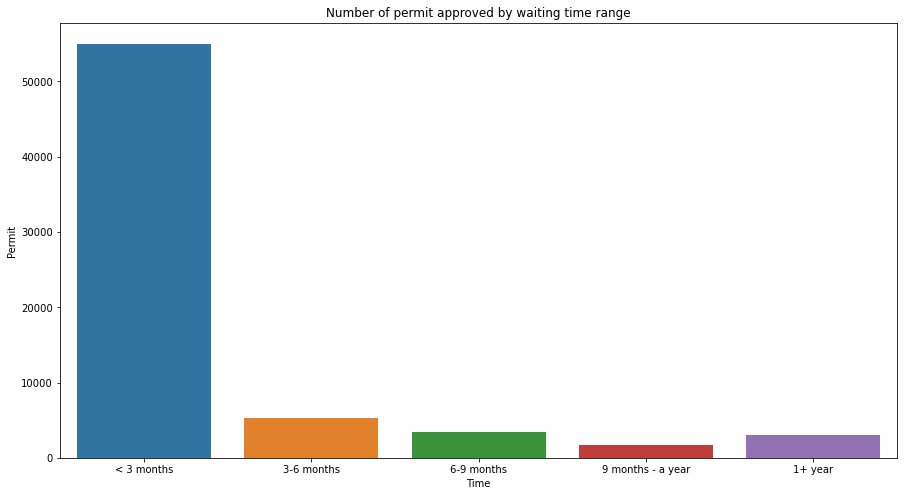

In [39]:
plt.figure(2, figsize= (15,8))
sns.countplot(x='Time2',data=df)
plt.xlabel("Time")
plt.ylabel("Permit")
plt.title("Number of permit approved by waiting time range")
plt.show()

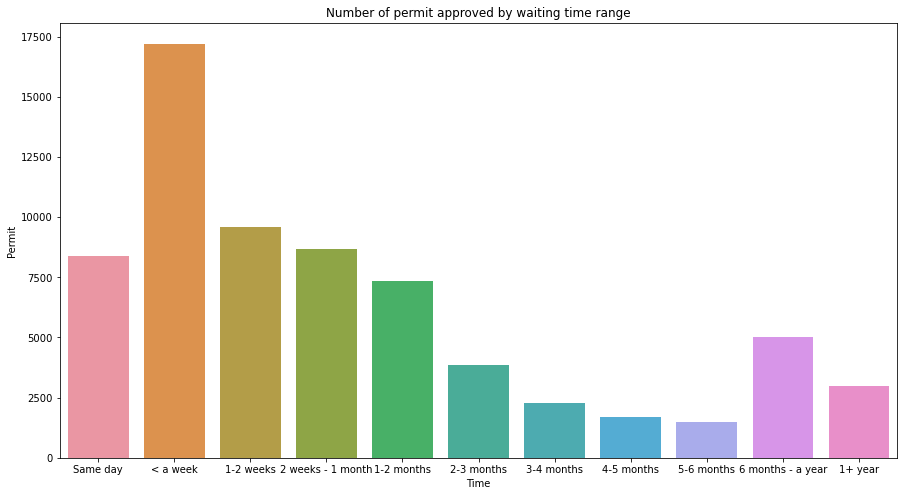

In [38]:
plt.figure(3, figsize= (15,8))
sns.countplot(x='Time3',data=df)
plt.xlabel("Time")
plt.ylabel("Permit")
plt.title("Number of permit approved by waiting time range")
plt.show()

In the big picture, most of these permits were issues in less than 3 months. That number is less than I expected, as I assume the number to be higher. In specific, it is suprising to me that most of the permits were issued in less than a week but not the same day. The number of permits issued in less than a week almost double the number of permits issued in 1-2 week time. It shows that most of these permits were issued in less than a week. Another suprising finding is that more than 8000 permits were issued in the same day it was filed. From the graph, we can see that the number of permits issued on the same day they were filed is higher than the number for those issued after months or years of filing. It shows that more 25000 cases was issued in less than a week. I now may believe that the time it took to issued permits do not negatively influence the real estate market.

In [16]:
a = df['Permit Type Definition'][df['Issued Date'].notnull() == True]

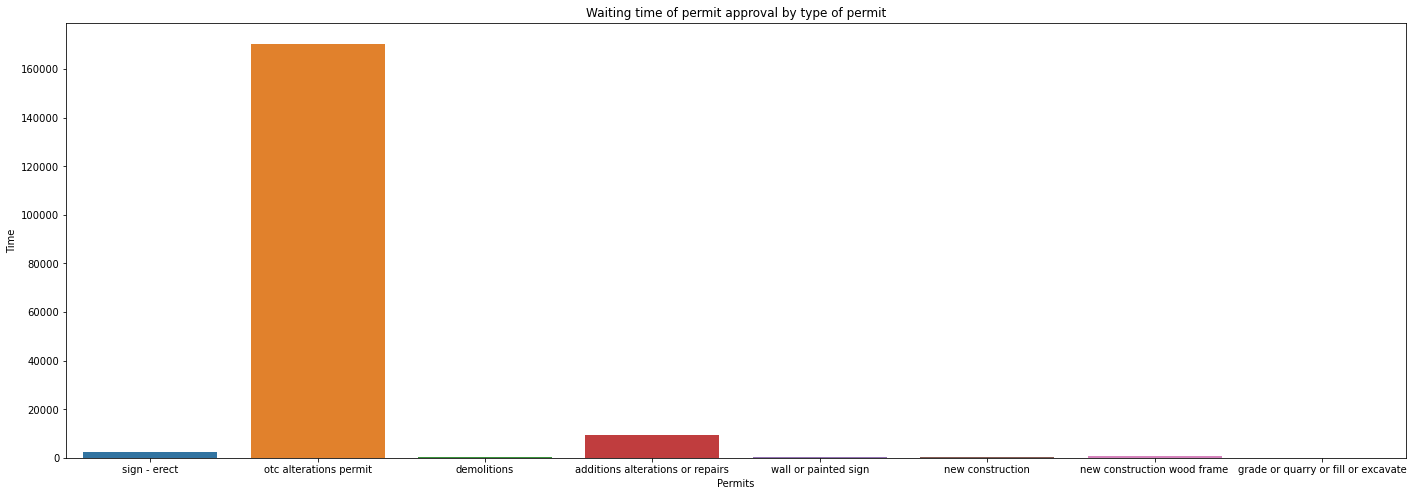

In [37]:
plt.figure(4, figsize= (24,8))
sns.countplot(x=a,data=df)
plt.xlabel("Permits")
plt.ylabel("Time")
plt.title("Waiting time of permit approval by type of permit")
plt.show()

otc alterations permits are the most issued type of permit, as there are over 160,000 permits of this type issued in the span of 4 years. The second highest type of permit issued is additions alterations or repairs permit, but this type of permit was only issued for less than 10,000 times. 6 other types of permits are either not popular or not qualified most of the time, and it results in the low number of permits issued.

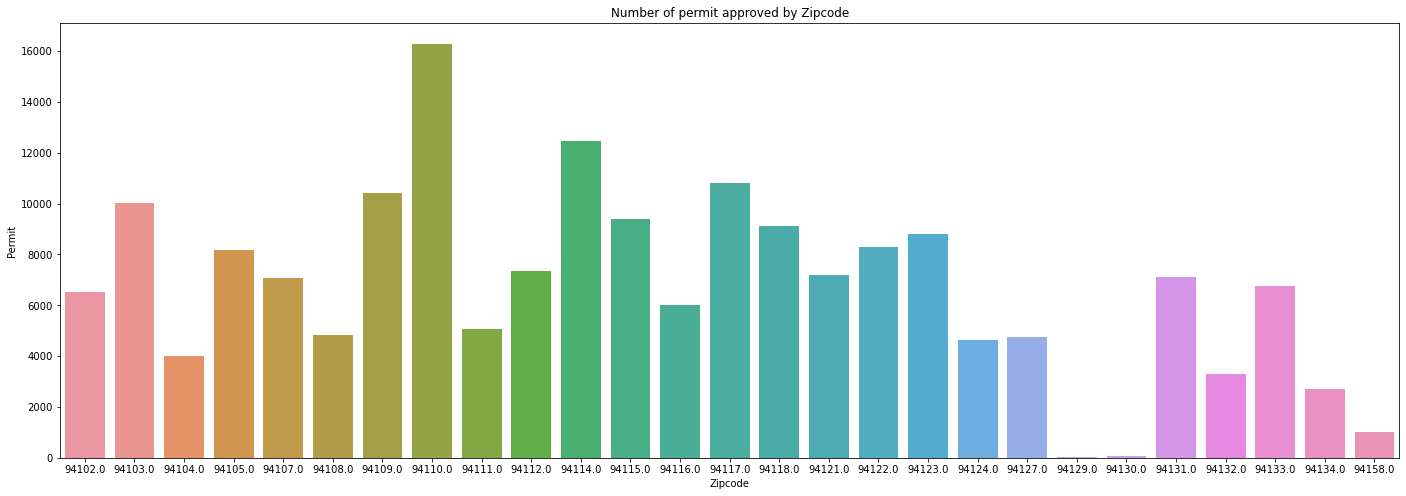

In [36]:
b = df['Zipcode'][df['Issued Date'].notnull() == True]
plt.figure(5, figsize= (24,8))
sns.countplot(x=b,data=df)
plt.xlabel("Zipcode")
plt.ylabel("Permit")
plt.title("Number of permit approved by Zipcode")
plt.show()

The distribution of permits over zip code zones are distinguish. It is clear to notice that 94110 is the area with highest number of permits issued at more than 16,000 permits issued. 94114, 94103, 94109, and 94117 are other zones in San Francisco that have at least 10,000 permits issued. On the other hand, 94129 and 94130 have the lowest number of permits, as both of these area have less than 100 permits each.

In [19]:
bins_3 = [0,1,5000,10000,20000,50000,100000,200000,500000,1000000,2000000,5000000,10000000,df['Estimated Cost'].max()]

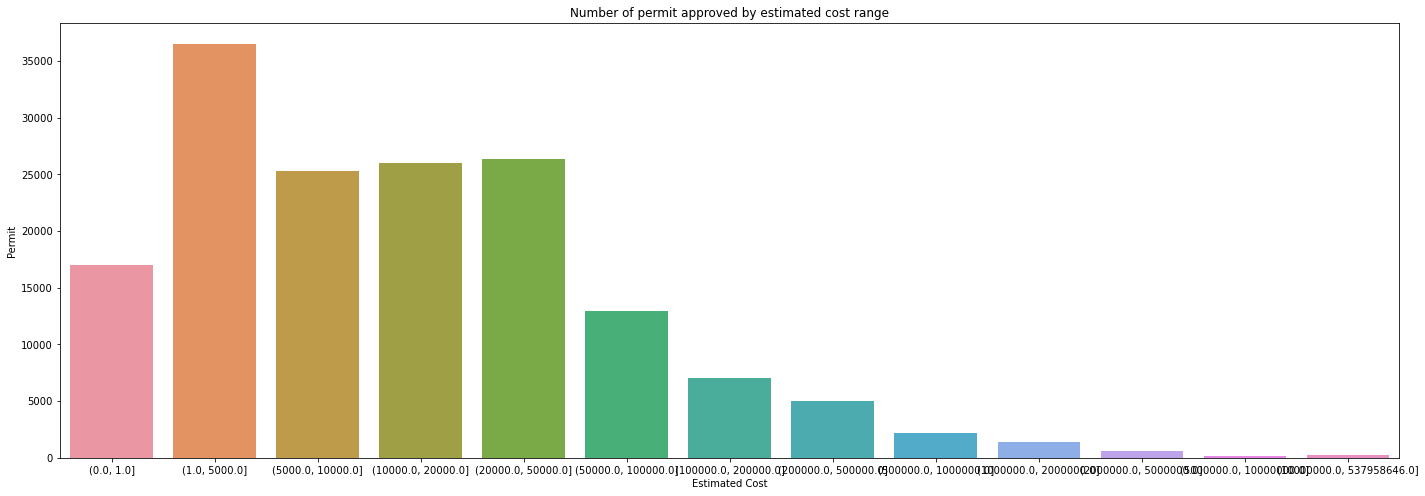

In [35]:
d = pd.cut(df['Estimated Cost'], bins_3,include_lowest =False)
plt.figure(6, figsize= (24,8))
sns.countplot(x=d,data=df)
plt.xlabel("Estimated Cost")
plt.ylabel("Permit")
plt.title("Number of permit approved by estimated cost range")
plt.show()

As I looked into the estimated cost of the building project, I find out that most of allowed projects have the estimated cost of less than 5,000 dollars. It shows that most of the allowed project in San Francisco are small projects like repair or alteration that do not cost much. For three cost ranges I use for cost that less than 50,000, the number of permits for each range stay slightly higher than 25,000 permits. As the cost gets higher from here, the number of permit decreases steadily.

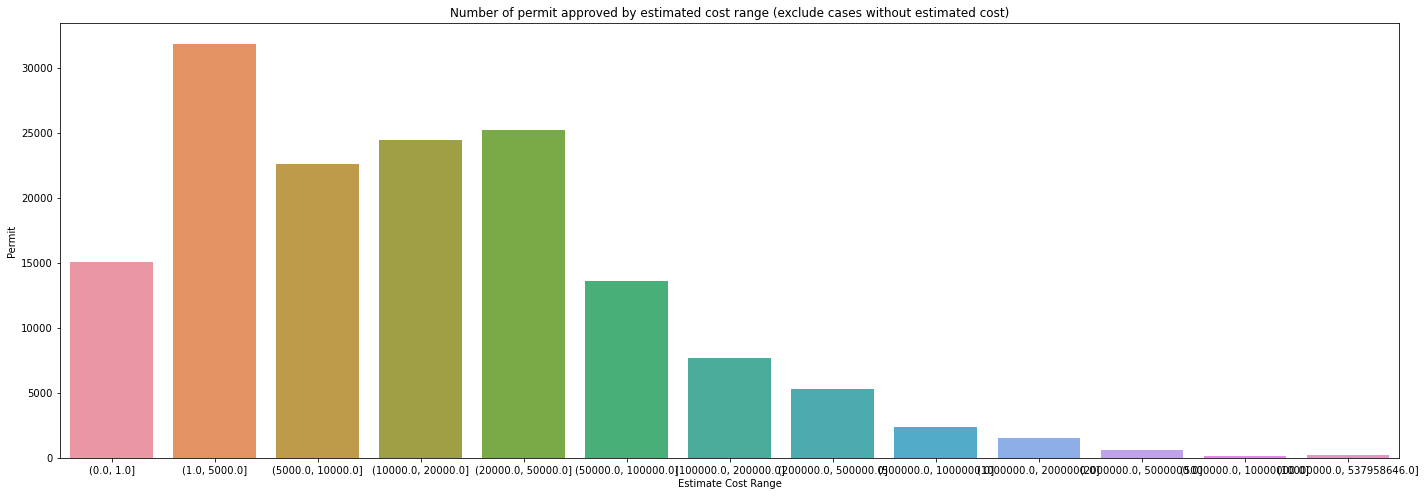

In [34]:
f=df['Revised Cost'][df['Estimated Cost'].notnull()==True]
e = pd.cut(f, bins_3,include_lowest =False)
plt.figure(7, figsize= (24,8))
sns.countplot(x=e,data=df)
plt.xlabel("Estimate Cost Range")
plt.ylabel("Permit")
plt.title("Number of permit approved by revised cost range (exclude cases without estimated cost)")
plt.show()

The trend of estimated cost apply to revised cost. However, the number of cases are less than those for estimated cost. This happens because I have to eliminate cases with no initial estimated cost. If this condition is not applied, we have the graph below:

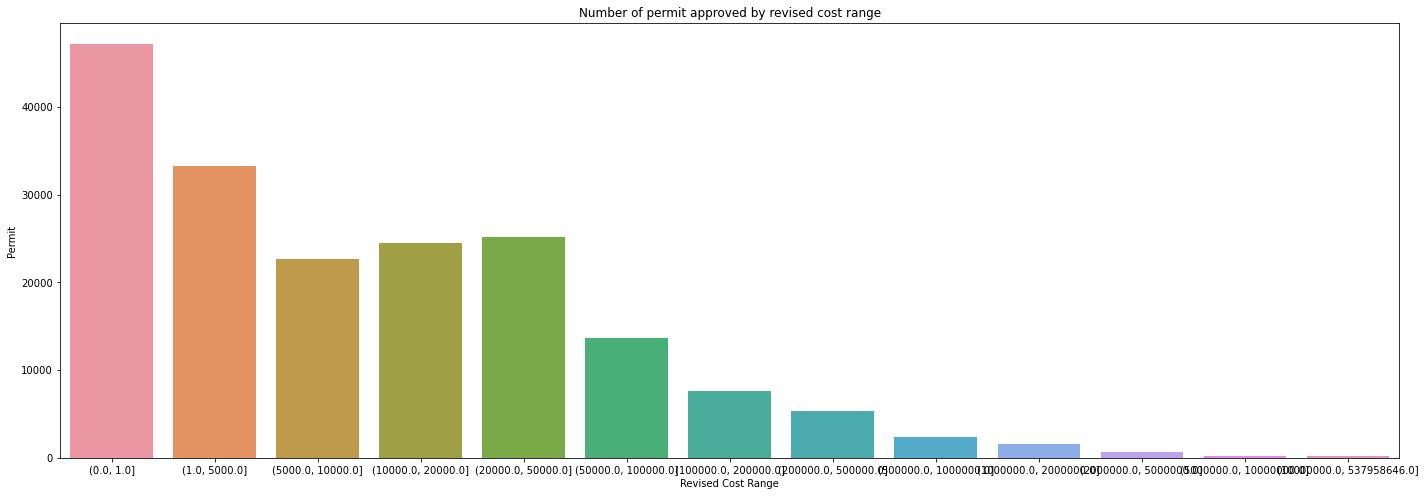

In [33]:
g = pd.cut(df['Revised Cost'], bins_3,include_lowest =False)
plt.figure(8, figsize= (24,8))
sns.countplot(x=g,data=df)
plt.xlabel("Revised Cost Range")
plt.ylabel("Permit")
plt.title("Number of permit approved by revised cost range")
plt.show()

When I do not apply the condition, the number of cases with 1 dollar revised cost spiked to more than 40,000. This number might be useful, as some of these project do not require any cost and 0 will be a null value if used. The trend for revised value as the cost get higher than 1 remain the same as two graphs above.

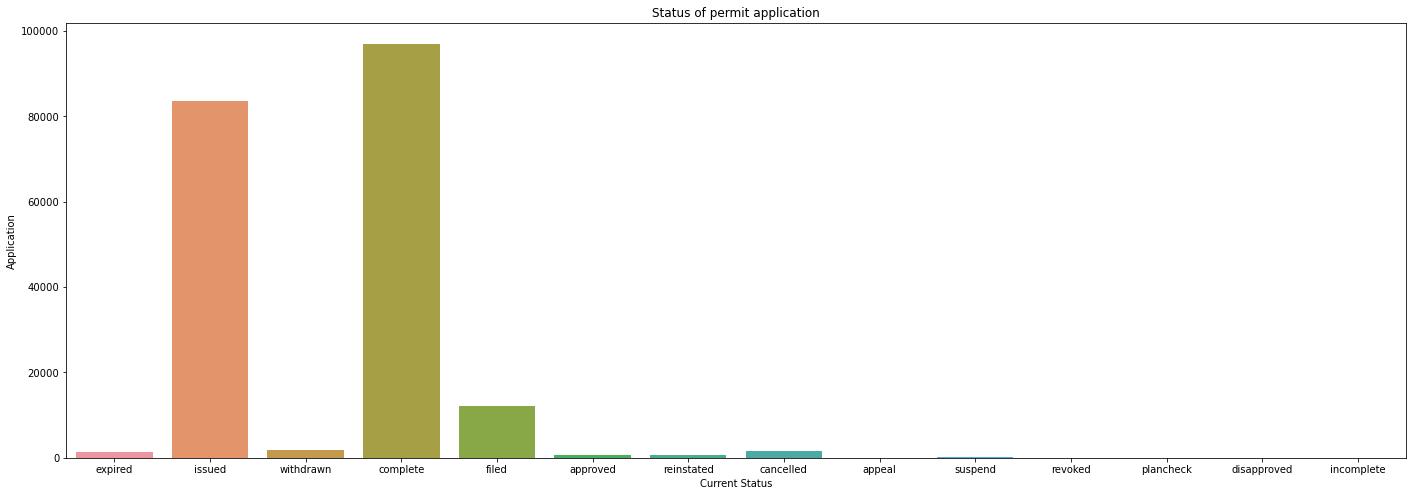

In [29]:
plt.figure(11, figsize= (24,8))
sns.countplot(x='Current Status',data=df)
plt.xlabel("Current Status")
plt.ylabel("Application")
plt.title("Status of permit application")
plt.show()

It is clear to see that most of the permit application are either issued or completed already. Not many of these permits application was disapproved or anything related to rejections.

Text(0.5, 1.0, 'Waiting time of different type of permit')

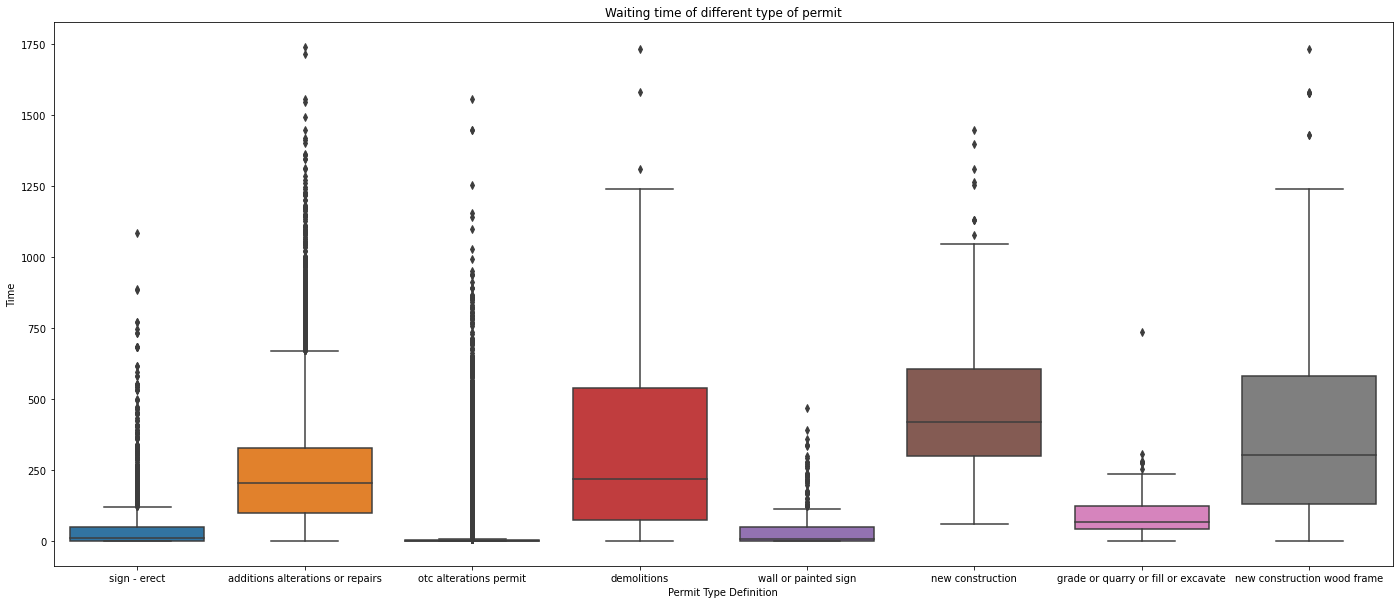

In [28]:
plt.figure(9, figsize=(24,10))
sns.boxplot(df['Permit Type Definition'],df['Time'])
plt.title("Waiting time of different type of permit")

From that plot, it is clear to see that otc alterations permit has the lowest average time to get permit issued. In addition to this, otc alterations permit also gets issued the most. New construction is the type of permit that takes the longest to be issued, as its average waiting time is almost 400 days. Addition alterations or repairs, demolitions and new construction wood frame are other types of permits that take 200-250 days on average to be issued.

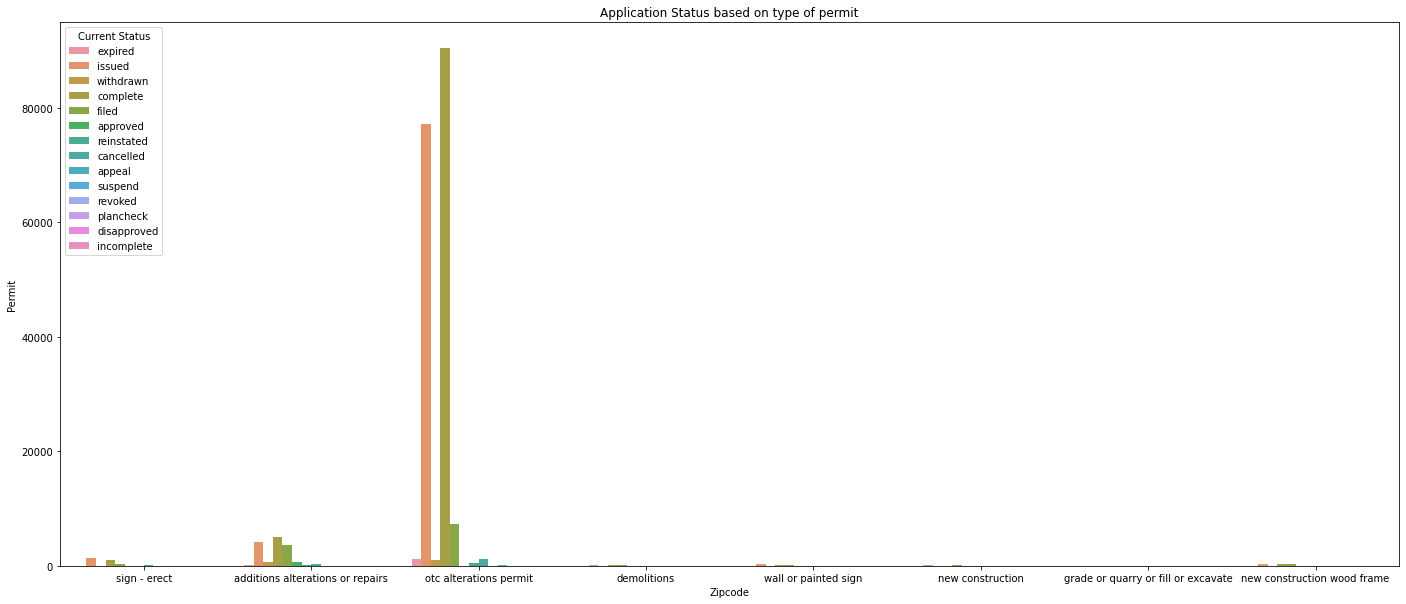

In [27]:
plt.figure(10, figsize=(24,10))
sns.countplot(x='Permit Type Definition',hue='Current Status',data=df)
plt.title("Application Status based on type of permit")
plt.xlabel("Zipcode")
plt.ylabel("Permit")
plt.show()

This graph shows that OTC alterations permit gets complete and issues the most, and it is impossible to analyse other type of permits. Therefore, I remove otc alterations permit from the graph and draw a new one.

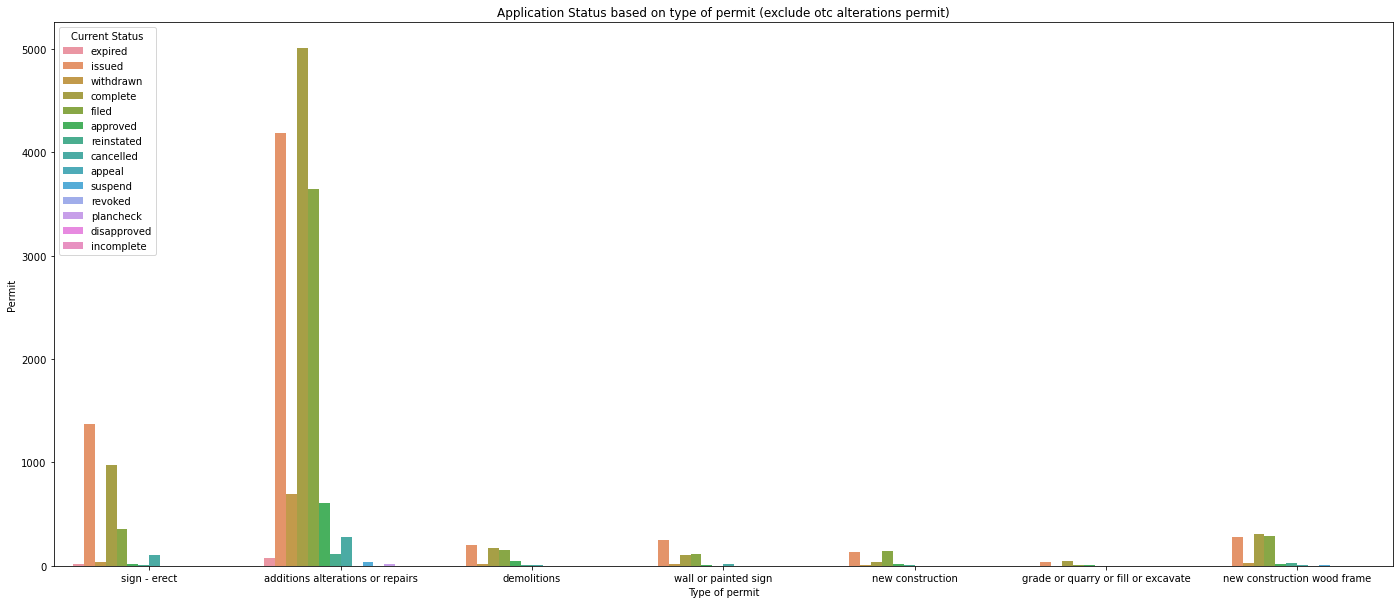

In [26]:
y=df['Permit Type Definition'][df["Permit Type Definition"] != 'otc alterations permit']
plt.figure(10, figsize=(24,10))
sns.countplot(y,hue='Current Status',data=df)
plt.title("Application Status based on type of permit (exclude otc alterations permit)")
plt.xlabel("Type of permit")
plt.ylabel("Permit")
plt.show()

From this new graph, it is clear to see that additions alterations or repairs have the second most issued and complete number of permits. As we get to look closer, we can see that all types of permits have high number of issues and complete cases. It means that the governmental agency do not disapprove enough application to affect the market.

Thanks to this graph, I can predict that which zipcode or type of permits would likely to be approved in the future. In addition to that, I would try to predict on whether the waiting time of the permit can be reduced due to any feature given in the dataset.

I have already included waiting time as a new attribute, as it will be better for my prediction model. This attribute opens me up to more questions as well as insights that I might miss if I do not have it.

Other work

In [11]:
df.Time.mean()

26.054696673189824

The average waiting time for a permit is 26 days. This is almost a month. The average is higher than the mode because there are many outliers with high waiting time that cause the average to be far away from the mode.